### The RK-4 Algorithm: Second order ODE

The Runge-Kutta 4th Order (RK-4) method solves the differential equation numerically by evaluating four slopes and computing a weighted average. The iterative process is described below:

- Consider the second order diffferential equation $$y''(x)=xy'(x)-y^2$$ and given initial conditions

$$y(0)=1,y'(0)=0$$  and we have to find $$y(2) , z(2)$$

1. **Step Size Calculation**:  
   The step size, $h$, defines how much to increment the value of $xf$ in each step. For each interval, the number of steps $n$ is given by:


   $$n = \frac{x_f - x_0}{h}$$
   
2. **Conversion to 2 first order ODE** 
 We will need to convert our equation to 2 first order ODE's to solve easily , for that let 
 
 $$z=y'(x)=f(x,y,z)$$ 
 
 and the other becomes 
 $$z'=xy'(x)-y^2 $$ 
 and intial conditions become $$y(0)=1,y'(0)=0, z(0)=0$$ and now we have to find $$y(2) , z(2)$$ 


3. **Slope Calculations**:  
   In each iteration, we calculate four slopes:

   $$k_1 = h \cdot f(x_0, y_0,z_0)$$
   
   $$l_1 = h \cdot g(x_0, y_0,z_0)$$

   $$k_2 = h \cdot f\left(x_0 + \frac{h}{2}, y_0 + \frac{k_1}{2}+z_0+\frac{l1}{2} \right)$$
   
   $$l_2 = h \cdot g\left(x_0 + \frac{h}{2}, y_0 + \frac{k_1}{2}+z_0+\frac{l1}{2} \right)$$

   $$k_3 = h \cdot f\left(x_0 + \frac{h}{2}, y_0 + \frac{k_2}{2},z_0+\frac{l2}{2} \right)$$
   
   $$l_3 = h \cdot g\left(x_0 + \frac{h}{2}, y_0 + \frac{k_2}{2},z_0+\frac{l2}{2} \right)$$

   $$k_4 = h \cdot f(x_0 + h, y_0 + k_3,z_0+l3)$$
   
   $$l_4 = h \cdot g(x_0 + h, y_0 + k_3,z_0+l3)$$
   
   

4. **Updating the Solution**:  
   The new value of $y$ is computed as:

   $$y_{x_0+h} = y_0 + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$
   
   $$z_{x_0+h} = z_0 + \frac{1}{6}(l_1 + 2l_2 + 2l_3 + l_4)$$
   
   

5. **Iteration**:  
   After computing the new value of $y$, update $x_0$ and $y_0$ for the next iteration:

   $$x_0 = x_0 + h$$
   
   $$y_0 = y_{\text{new}}$$
   
   

6. **Continue Until Completion**:  
   The process continues until the interval from $x_0$ to $x_f$ is covered, and the final value of y is computed.
   
---

In summary, the RK-4 method computes a weighted average of four slopes at different points within an interval. It provides a more accurate solution to the differential equation compared to simpler methods like Euler's.

ENTER X0 :  0
ENTER Y0 :  1
ENTER XF :  2
ENTER Z0 (derivative of y at x0):  0
ENTER STEP SIZE (Less Than 1 :  0.1


VALUE OF THE GIVEN DIFF EQUATION AT xf is = -1.9243410867155502
VALUE OF THE GIVEN DIFF EQUATION AT xf is = -5.599400451900628


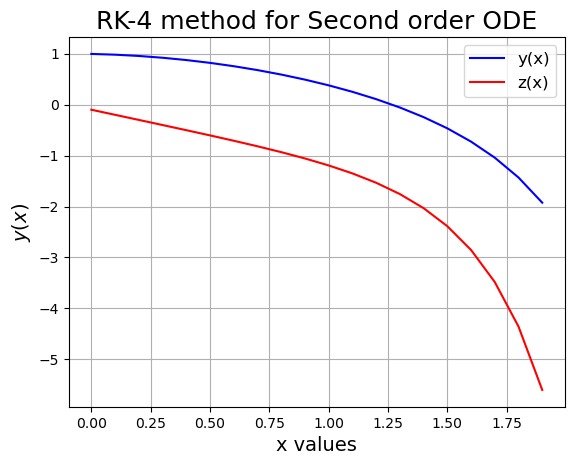

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct  8 14:32:11 2024

@author: kotil
"""
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
def f(x,y,z):
    f=z   #THIS MEANS dy/dx=f=(whatever function is written here)
    return f
def g(x,y,z):
    g=x*z-y**2
    return g
x0=eval(input("ENTER X0 : "))
y0=eval(input("ENTER Y0 : "))
xf=eval(input("ENTER XF : "))
z0=eval(input("ENTER Z0 (derivative of y at x0): "))

p=[]
q=[]
r=[]

h=eval(input("ENTER STEP SIZE (Less Than 1 : "))

if xf<x0:
    h=-abs(h)

n=(xf-x0)/h

while n>0:
    k1=h*f(x0,y0,z0)
    l1=h*g(x0,y0,z0)
    
    k2=h*f(x0+h/2,y0+k1/2,z0+l1/2)
    l2=h*g(x0+h/2,y0+k1/2,z0+l1/2)
    
    k3=h*f(x0+h/2,y0+k2/2,z0+l2/2)
    l3=h*g(x0+h/2,y0+k2/2,z0+l2/2)

    k4=h*f(x0+h,y0+k3,z0+l3)
    l4=h*g(x0+h,y0+k3,z0+l3)
    
    yf=y0+(1/6)*(k1+2*k2+2*k3+k4)
    zf=z0+(1/6)*(l1+2*l2+2*l3+l4)
    
    p.append(x0)
    q.append(yf)
    r.append(zf)
    
    y0=yf
    z0=zf #so that on next iteration y0 takes value of yf in this iteration
    x0=x0+h
    n=n-1
    
print("VALUE OF THE GIVEN DIFF EQUATION AT xf is =",yf)
print('VALUE OF THE GIVEN DIFF EQUATION AT xf is =',zf)
plt.plot(p,q,linestyle="solid",color='blue')
plt.plot(p,r,linestyle="solid",color='red')
plt.title("RK-4 method for Second order ODE",fontsize=18)
plt.xlabel("x values",fontsize=14)
plt.ylabel(r"$y(x)$",fontsize=14)
plt.legend([r"y(x)",r"z(x)"],fontsize=12)
plt.grid(True)
plt.show()  